In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [57]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\EastWestAirlines.csv")

In [58]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### EDA

In [59]:
# droping the id column

In [60]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

In [61]:
df.drop(columns=['ID#'],inplace=True)

In [65]:
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [53]:
# Taking Important column

In [66]:
data=df.loc[:,['Balance','Flight_miles_12mo','Days_since_enroll','Bonus_miles']]

In [81]:
data.head()

,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles,cluster
0,28143,0,7000,174,1
1,19244,0,6968,215,1
2,41354,0,7034,4123,1
3,14776,0,6952,500,1
4,97752,2077,6935,43300,1


In [68]:
data.describe()

,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles
count,3.999000e+03,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,460.055764,4118.55939,17144.846212
std,1.007757e+05,1400.209171,2065.13454,24150.967826
min,0.000000e+00,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,2330.00000,1250.000000
50%,4.309700e+04,0.000000,4096.00000,7171.000000
75%,9.240400e+04,311.000000,5790.50000,23800.500000
max,1.704838e+06,30817.000000,8296.00000,263685.000000


### Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc=StandardScaler()
x=sc.fit_transform(data)
x

array([[-4.51140783e-01, -3.28603258e-01,  1.39545434e+00,
        -7.02786266e-01],
       [-5.39456874e-01, -3.28603258e-01,  1.37995704e+00,
        -7.01088399e-01],
       [-3.20031232e-01, -3.28603258e-01,  1.41192021e+00,
        -5.39252702e-01],
       ...,
       [-4.29480975e-05, -3.28603258e-01, -1.31560393e+00,
         3.43803696e-01],
       [-1.85606976e-01,  2.85309024e-02, -1.31608822e+00,
        -6.89286154e-01],
       [-7.00507951e-01, -3.28603258e-01, -1.31754109e+00,
        -7.09991847e-01]])

### Create a dendrogram

In [71]:
from scipy.cluster import hierarchy

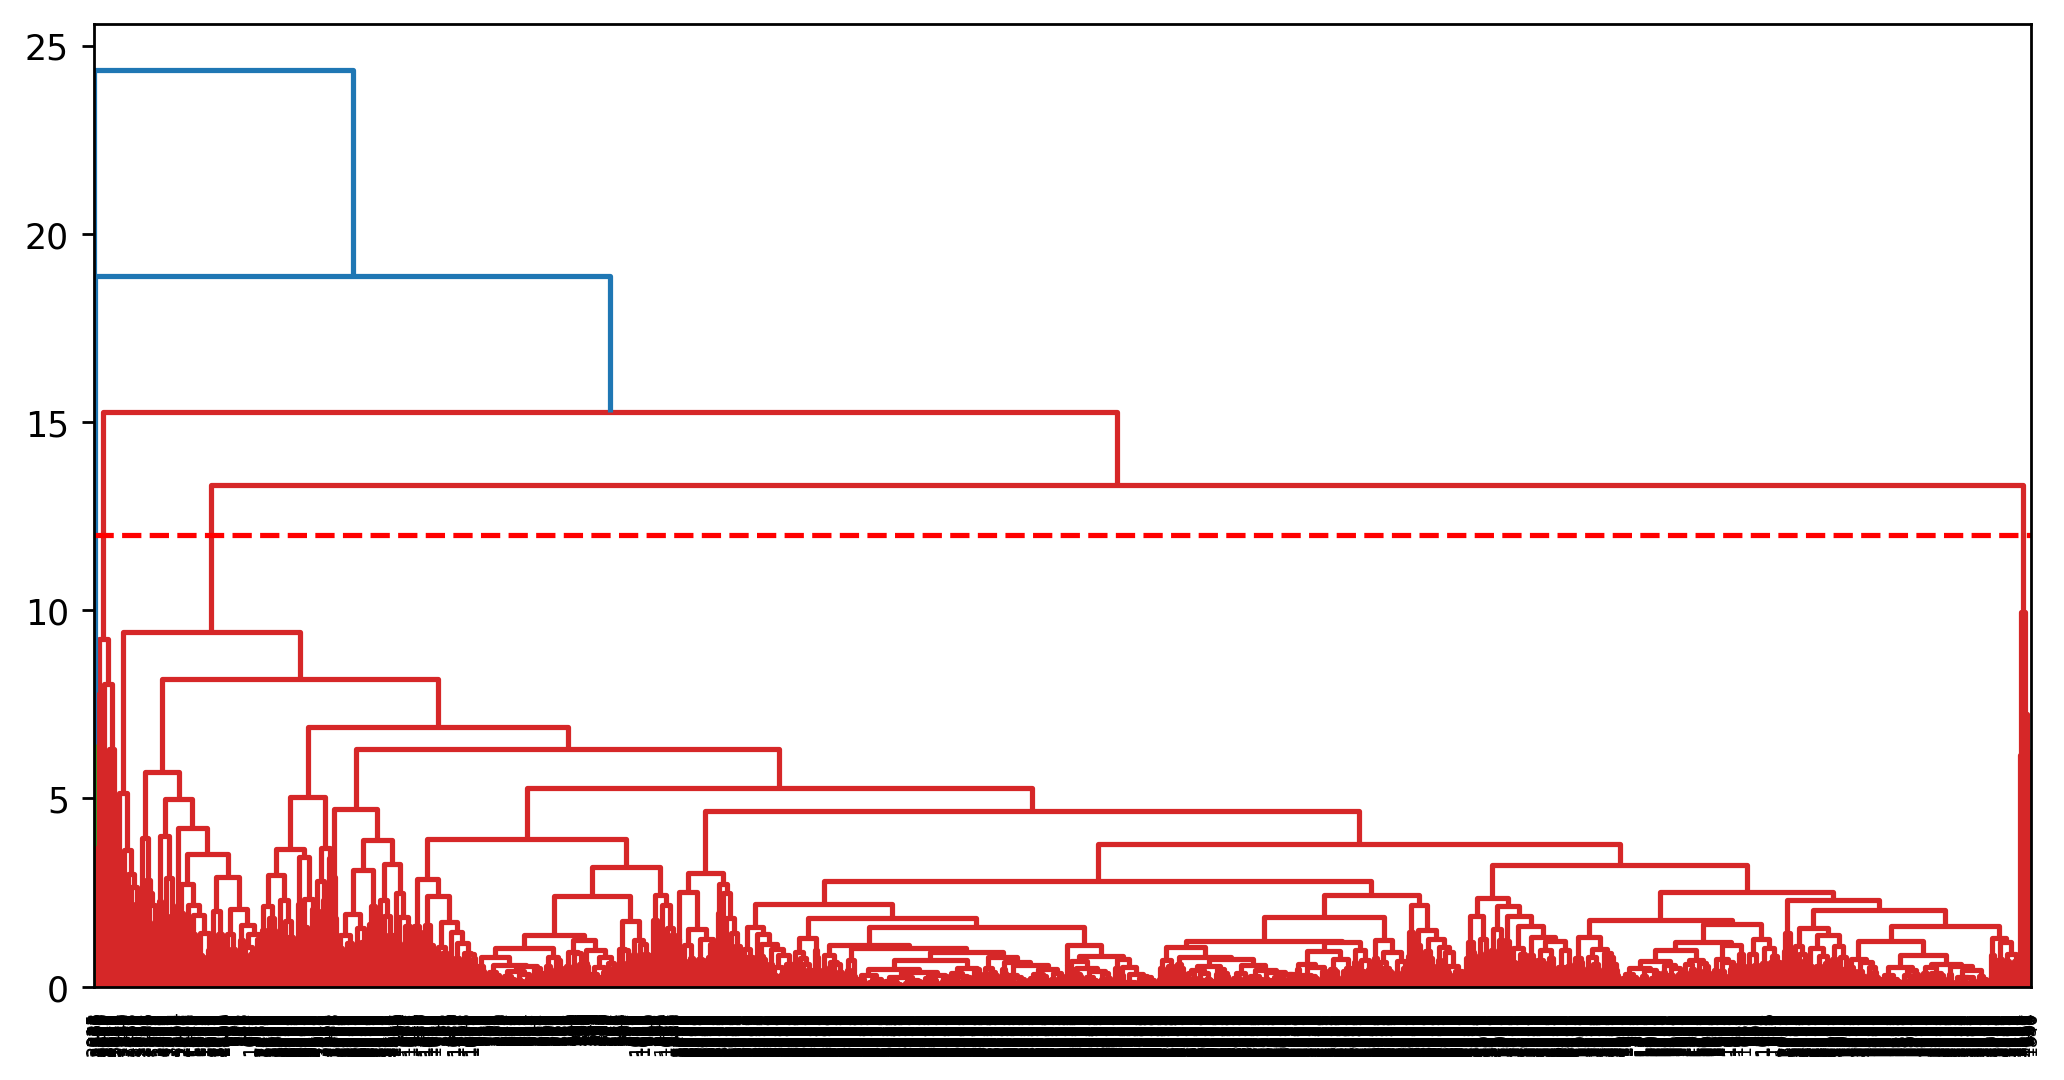

In [73]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.axhline(y=12,c='red',linestyle='--')

### Model building

In [74]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
hc=AgglomerativeClustering(n_clusters=3)

In [76]:
y=hc.fit_predict(x)

In [30]:
# create new column to store cluster label

In [77]:
data['cluster']=y

In [78]:
# analyzing the algorithm labelling

In [79]:
data.groupby('cluster').agg('mean')

,Balance,Flight_miles_12mo,Days_since_enroll,Bonus_miles
cluster,,,,
0,361798.876471,3832.923529,5592.947059,58135.941176
1,76040.169364,421.993683,5081.900118,20738.035926
2,31030.980710,92.018519,2042.334105,4745.127315


<AxesSubplot:xlabel='Balance', ylabel='Flight_miles_12mo'>

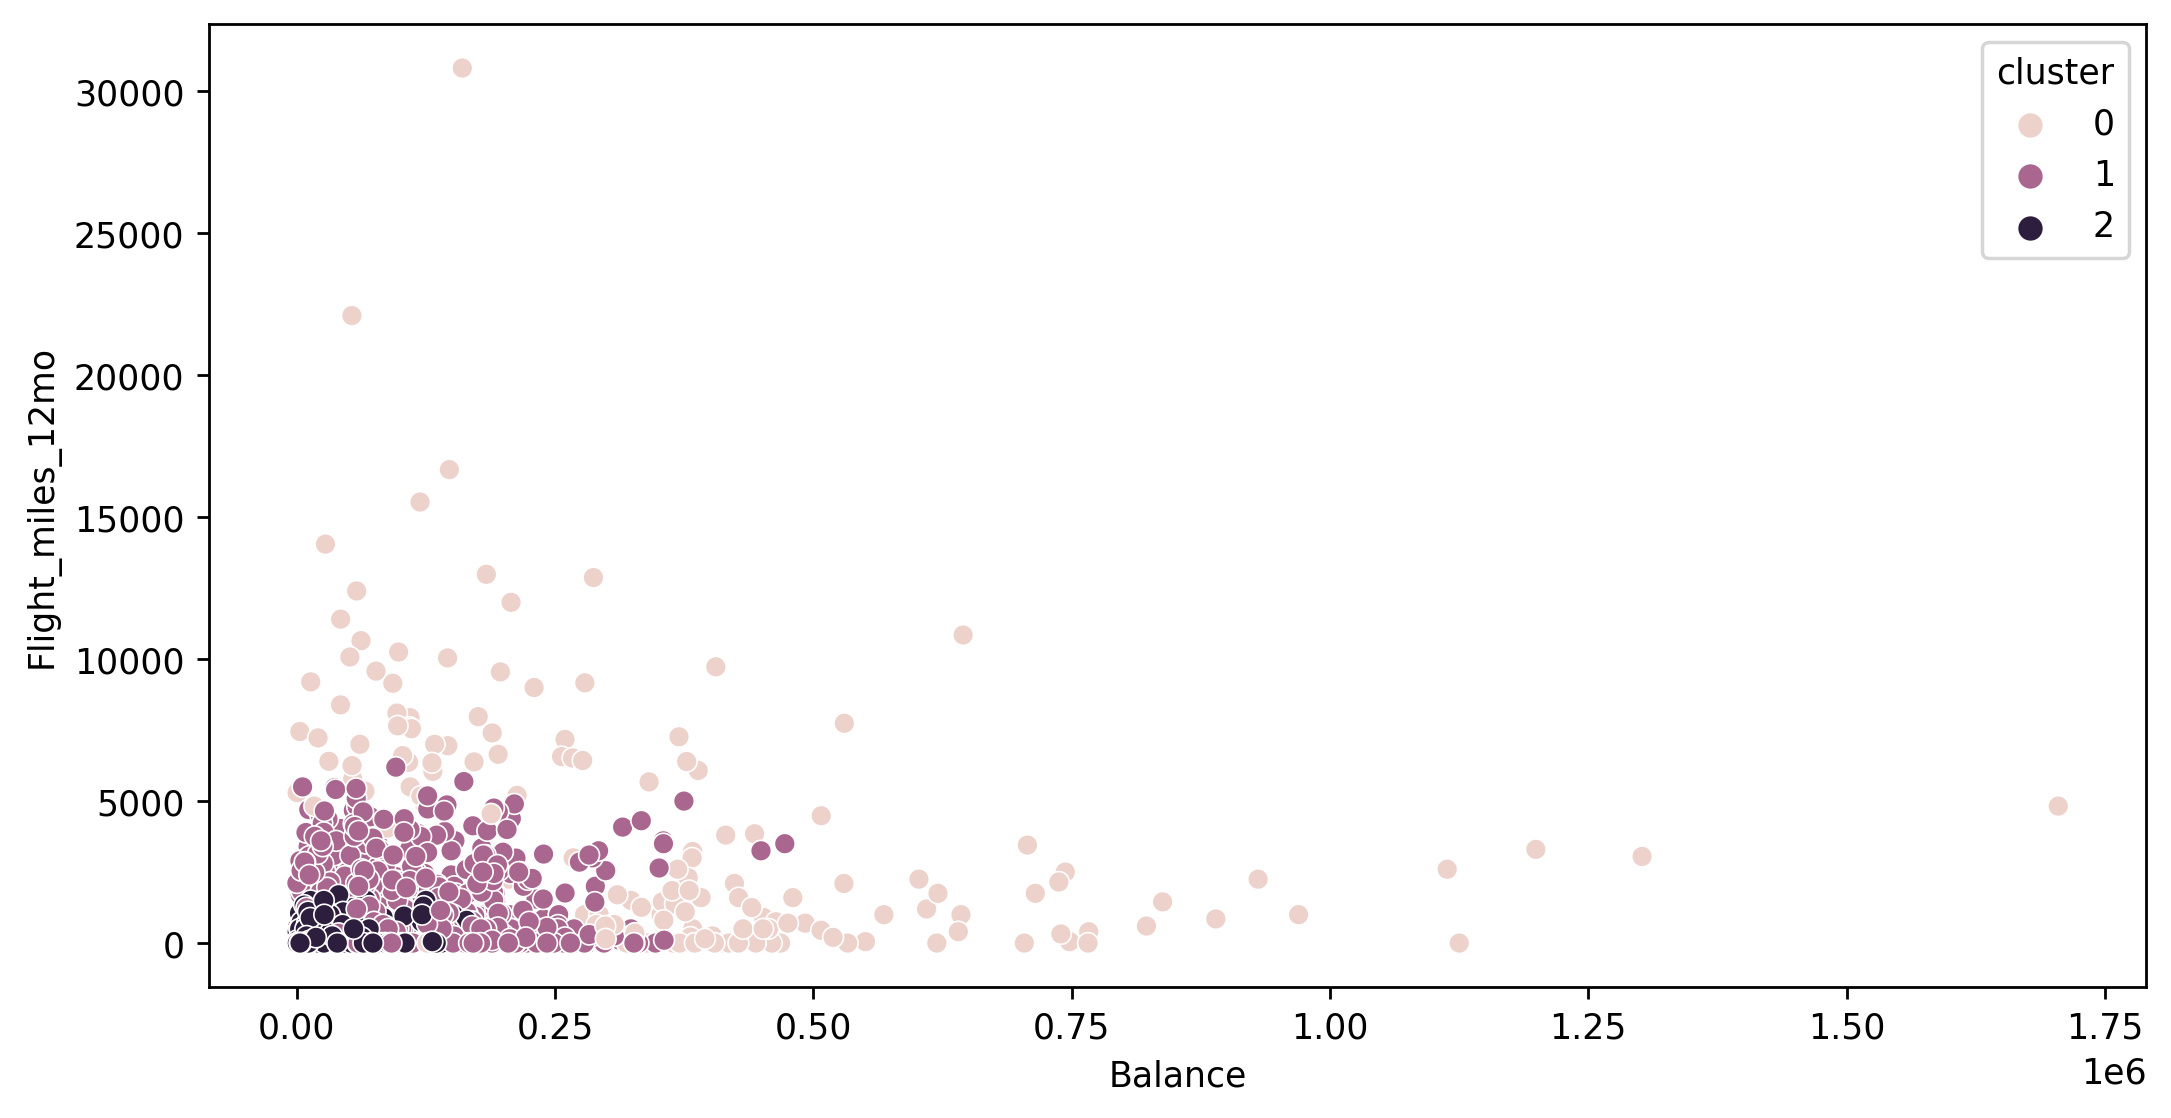

In [80]:
sb.scatterplot(data['Balance'],data['Flight_miles_12mo'],hue=data['cluster'])